In [1]:
import pandas as pd
import numpy as np
from math import pi
import warnings
import matplotlib.pyplot as plt

# Downloading dataset containing Emissions, GDP and Population

In [2]:
Data = pd.read_csv('https://raw.githubusercontent.com/AntoineTrabia/Green-Domestic-Product/main/data/Data_for_GrDP.csv')

In [3]:
# Define a dictionary mapping country codes to their full names
country_mapping = {
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CY': 'Cyprus',
    'CZ': 'Czechia',
    'DE': 'Germany',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'EL': 'Greece',
    'ES': 'Spain',
    'EU27_2020': 'European Union - 27 countries (from 2020)',
    'FI': 'Finland',
    'FR': 'France',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'IE': 'Ireland',
    'IS': 'Iceland',
    'IT': 'Italy',
    'LT': 'Lithuania',
    'LV': 'Latvia',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SE': 'Sweden',
    'SI': 'Slovenia',
    'SK': 'Slovakia'
}

# Replace country codes with full names using the dictionary
Data['countries'].replace(country_mapping, inplace=True)

# Marginal Damage Cost of pollutants

## Information on dataset
GHG: Euro per tCO2eq

Health 1: Impact on health from fine particulate matter and ozone
Euro per tonne of emissions of precursors

Health 2: Impact on health from NO2
Euro per tonne of emissions of precursors

Crops: Impact on crops from ozone
Euro per tonne of emissions of precursors

Forests: Impact on forests from ozone
Euro per tonne of emissions of precursors

Buildings: Impact on buildings
Euro per tonne of emissions

Ecosystems: Impact on ecosystems (eutrophication)
Euro per tonne of emissions  of precursors

Heavy metals: Euro per kg of pollutant

In [5]:
MDC = pd.read_excel('https://raw.githubusercontent.com/AntoineTrabia/Green-Domestic-Product/main/data/MDC.xlsx')

In [6]:
# We convert the unit into euro per tonne of pollutant for the heavy metals
heavy_metals = ['Pb cost', 'Cd cost', 'Hg cost', 'As cost', 'Ni cost','Cr cost']
for metal in heavy_metals:
  MDC[metal] = 1000*MDC[metal]

In [7]:
MDC_TOTAL = MDC.loc[:,['countries', 'Low GHG ', 'Central GHG ', 'High GHG ', 'Pb cost', 'Cd cost', 'Hg cost', 'As cost', 'Ni cost','Cr cost']]

MDC_TOTAL['NOx TOTAL (VOLY)'] = MDC['Health 1: Nox VOLY '] + MDC['Health 2: NOx VOLY'] + MDC['Crops: NOx'] + MDC['Forests: NOx'] + MDC['Buildings: Nox'] + MDC['Ecosystems: NOx']
MDC_TOTAL['NOx TOTAL (VSL)'] = MDC['Health 1: Nox VSL'] + MDC['Health 2: NOx VSL'] + MDC['Crops: NOx'] + MDC['Forests: NOx'] + MDC['Buildings: Nox'] + MDC['Ecosystems: NOx']

MDC_TOTAL['PM2.5 TOTAL (VOLY)'] = MDC['Health 1: PM2.5 VOLY']
MDC_TOTAL['PM2.5 TOTAL (VSL)'] = MDC['Health 1: PM2.5 VSL']

MDC_TOTAL['PM10 TOTAL (VOLY)'] = MDC['Health 1: PM10 VOLY']
MDC_TOTAL['PM10 TOTAL (VSL)'] = MDC['Health 1: PM10 VSL']

MDC_TOTAL['SOx TOTAL (VOLY)'] = MDC['Health 1: SOx VOLY'] + MDC['Buildings: SOx']
MDC_TOTAL['SOx TOTAL (VSL)'] = MDC['Health 1: SOx VSL'] + MDC['Buildings: SOx']

MDC_TOTAL['NMVOC TOTAL (VOLY)'] = MDC['Health 1: NMVOC VOLY'] + MDC['Crops: NMVOC'] + MDC['Forests: NMVOC']
MDC_TOTAL['NMVOC TOTAL (VSL)'] = MDC['Health 1: NMVOC VSL'] + MDC['Crops: NMVOC'] + MDC['Forests: NMVOC']

MDC_TOTAL['NH3 TOTAL (VOLY)'] = MDC['Health 1: NH3 VOLY'] + MDC['Ecosystems: NH3']
MDC_TOTAL['NH3 TOTAL (VSL)'] = MDC['Health 1: NH3 VSL'] + MDC['Ecosystems: NH3']

# Calculation of GrDP (High + VOLY)

In [8]:
Data_for_calc = pd.merge(Data, MDC_TOTAL, on=['countries'])

In [9]:
MDC_Columns = ['High GHG ', 'Pb cost',
       'Cd cost', 'Hg cost', 'As cost', 'Ni cost', 'Cr cost',
       'NOx TOTAL (VSL)', 'PM2.5 TOTAL (VSL)',
       'PM10 TOTAL (VSL)',
       'SOx TOTAL (VSL)', 'NMVOC TOTAL (VSL)',
      'NH3 TOTAL (VSL)']
Emissions_columns = ['GHG','Pb','Cd', 'Hg', 'As', 'Ni','Cr',
       'NOx', 'PM2.5', 'PM10','SOx', 'NMVOC','NH3']
Data_for_calc['external price (high + VSL)'] = 0
for MDC, emissions in zip(MDC_Columns, Emissions_columns):
    Data_for_calc['external price (high + VSL)'] += (Data_for_calc[emissions] * Data_for_calc[MDC])*1e-6

In [10]:
GrDP = Data_for_calc.loc[:,['countries','Year']]
GrDP['GrDP (high + VSL)'] = Data_for_calc['GDP'] - Data_for_calc['external price (high + VSL)']
GrDP.dropna(inplace=True)
GrDP

,countries,Year,GrDP (high + VSL)
5,Belgium,1995,-2733.730754
6,Belgium,1996,-1706.015662
7,Belgium,1997,10256.764244
8,Belgium,1998,21528.506963
9,Belgium,1999,45271.590117
...,...,...,...
827,Slovakia,2017,47031.025310
828,Slovakia,2018,54048.782696
829,Slovakia,2019,60531.004163
830,Slovakia,2020,62935.355224


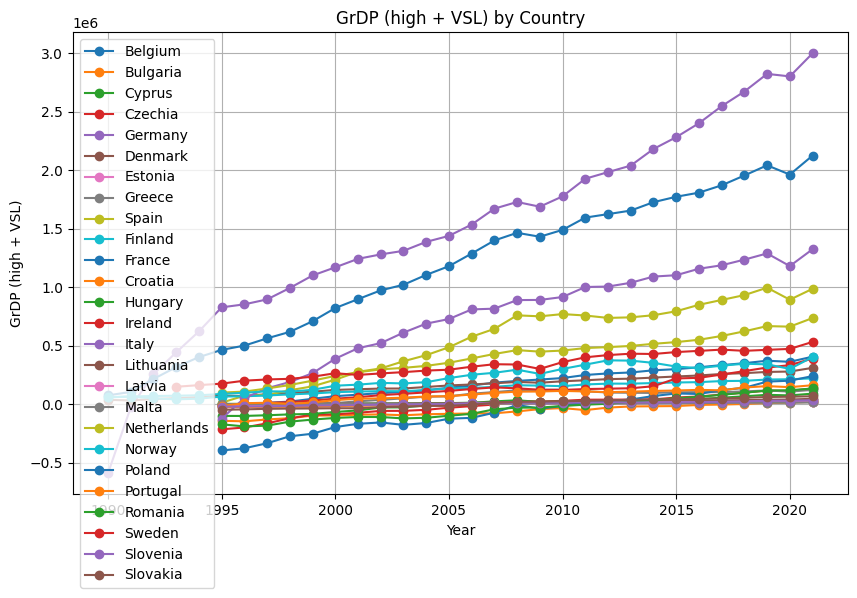

In [11]:
plt.figure(figsize=(10, 6))

# Iterate over unique countries
for country in GrDP['countries'].unique():
    # Filter data for each country
    country_data = GrDP[GrDP['countries'] == country]
    # Plot country's data
    plt.plot(country_data['Year'], country_data['GrDP (high + VSL)'], marker='o', label=country)

plt.title('GrDP (high + VSL) by Country')
plt.xlabel('Year')
plt.ylabel('GrDP (high + VSL)')
plt.legend()
plt.grid(True)
plt.show()